In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import pandas as pd
import numpy as np

In [ ]:
class region():
    
    def __init__(self, name, default_rating):
        self.name = name
        self.default_rating = default_rating
        self.teams = []
        
    def print_rankings(self):
        rank_dict = {"Team": [team.name for team in self.teams], "Rating": [team.rating for team in self.teams]}
        rankings = pd.DataFrame.from_dict(rank_dict)
        rankings = rankings.sort_values(by="Rating", ascending=False)
        print(rankings.to_string(index=False))

class team():
    
    def __init__(self, name, region, est_date, initial_rating=None):
        
        self.name = name

        self.region = region
        if initial_rating:
            self.rating = initial_rating
        else:
            self.rating = region.default_rating
            
        self.game_dates = [date_from_string(est_date)]
        self.rating_history = [self.rating]
        self.game_indices = [0]
        
        region.teams.append(self)
            
        print("Added {} to as a team in {}. Their initial ELO is {}.".format(name, 
                                                                        region.name, self.rating))
def date_from_string(x):
    return datetime.datetime(*[int(item) for item in x.split('-')])

def world_top_ten(regions):
    all_teams = []
    all_ratings = []
    for region in regions:
        for team in region.teams:
            all_teams.append(team.name)
            all_ratings.append(team.rating)
    d = pd.DataFrame.from_dict({"Team": all_teams, "Rating": all_ratings})
    d = d.sort_values(by="Rating", ascending=False)
    print(d.head(n=10).to_string(index=False))

def game(winner, loser, date, verbose=False):
    
    date = date_from_string(date)
    if verbose:
        print("Calculating Elo changes from {}'s victory over {} on {}.".format(winner.name, loser.name, date))
    winner.game_dates.append(date)
    loser.game_dates.append(date)
    winner.game_indices.append(winner.game_indices[-1]+1)
    loser.game_indices.append(loser.game_indices[-1]+1)
    
    nwr, nlr = calc_new_ratings(winner.rating, loser.rating)
    if verbose:
        print("Game win increased {}'s Elo from {} to {}.".format(winner.name, winner.rating, nwr))
    winner.rating = nwr
    winner.rating_history.append(winner.rating)
    if verbose:   
        print("Game loss decreased {}'s Elo from {} to {}.".format(loser.name, loser.rating, nlr))
    loser.rating = nlr
    loser.rating_history.append(loser.rating)
    
def predict_winner(t1, t2):
    p1 = round(100 * (t1.rating / (t1.rating + t2.rating)), 2)
    p2 = round(100 * (t2.rating / (t1.rating + t2.rating)), 2)
    print("{}'s chance of winning:\t{}%".format(t1.name, p1))
    print("{}'s chance of winning:\t{}%".format(t2.name, p2))
    

def predict_bo5(t1, t2):
    p1 = round(100 * (t1.rating / (t1.rating + t2.rating)), 2)
    p2 = round(100 * (t2.rating / (t1.rating + t2.rating)), 2)
    
    w1 = (p1**3) + (3*(p1**3)*p2) + (6*(p1**3)*(p2**2))
    w2 = (p2**3) + (3*(p2**3)*p1) + (6*(p2**3)*(p1**2))
    
    print("{}'s chance of winning a best of 5:\t{}%".format(t1.name, p1))
    print("{}'s chance of winning a best of 5:\t{}%".format(t2.name, p2))
    
def calc_new_ratings(r1, r2, k=24):
    '''
    docstring at some point
    '''
    # First, compute transformed ratings for each team
    R1 = 10 ** (r1/400)
    R2 = 10 ** (r2/400)
    
    # Second, comute expected score for each team
    E1 = R1/(R1+R2)
    E2 = R2/(R1+R2)
    
    # Third, set results
    S1 = 1
    S2 = 0
    
    # Fourth, update Elo ratings for each team
    new_r1 = round(r1 + k*(S1-E1))
    new_r2 = round(r2 + k*(S2-E2))
    
    return new_r1, new_r2

In [3]:
# Define teams and regions
## Define regions
EU = region('Europe', 1500)
NA = region('North America', 1500)
KR = region('Korea', 1600)
CN = region('China', 1550)
LMS = region('Taiwan/Hong Kong', 1500)
INT = region('INT', 1400)
VCS = region('Vietnam', 1450)

world = [EU, NA, KR, CN, LMS]

## Define teams for each region
### EU teams
FNC = team('Fnatic', EU, '2018-01-15')
G2 = team('G2 Esports', EU, '2018-01-15')
SPY = team('Splyce', EU, '2018-01-15')
VIT = team('Team Vitality', EU, '2018-01-15')
H2K = team('H2K', EU, '2018-01-15')
MSF = team('Misfits Gaming', EU, '2018-01-15')
ROC = team('ROCCAT', EU, '2018-01-15')
GIA = team('Giants', EU, '2018-01-15')
S04 = team('FC Schalke 04', EU, '2018-01-15')
UOL = team('Unicorns of Love', EU, '2018-01-15')

### NA teams
FOX = team('Echo Fox', NA, '2018-01-15')
C9 = team('Cloud9', NA, '2018-01-15')
T100 = team('100 Thieves', NA, '2018-01-15')
TSM = team('TSM', NA, '2018-01-15')
CG = team('Clutch Gaming', NA, '2018-01-15')
TL = team('Team Liquid', NA, '2018-01-15')
CLG = team('Counter Logic Gaming', NA, '2018-01-15')
FLY = team('FlyQuest', NA, '2018-01-15')
OPT = team('OpTic Gaming', NA, '2018-01-15')
GGS = team('Golden Guardians', NA, '2018-01-15')

### KR teams
KZ = team('KING-ZONE DragonX', KR, '2018-01-15')
AFS = team('Afreeca Freecs', KR, '2018-01-15')
KT = team('kt Rolster', KR, '2018-01-15')
KSV = team('KSV', KR, '2018-01-15')
ROX = team('ROX Tigers', KR, '2018-01-15')
MVP = team('MVP', KR, '2018-01-15')
JAG = team('Jin Air GreenWings', KR, '2018-01-15')
SKT = team('SK telecom T1', KR, '2018-01-15')
BBQ = team('bbq OLIVERS', KR, '2018-01-15')
KDM = team('KONGDOO MONSTER', KR, '2018-01-15')

### CN teams
EDG = team('Edward Gaming', CN, '2018-01-14')
SS = team('Snake Esports', CN, '2018-01-14')
BLG = team('Bilibili Gaming', CN, '2018-01-14')
WE = team('Team WE', CN, '2018-01-14')
FPX = team('FunPlus Phoenix', CN, '2018-01-14')
OMG = team('Oh My God', CN, '2018-01-14')
VG = team('Vici Gaming', CN, '2018-01-14')

IG = team('Invictus Gaming', CN, '2018-01-14')
RW = team('Rogue Warriors', CN, '2018-01-14')
RNG = team('Royal Never Give Up', CN, '2018-01-14')
SNG = team('Suning Gaming', CN, '2018-01-14')
JDG = team('JD Gaming', CN, '2018-01-14')
LGD = team('LGD Gaming', CN, '2018-01-14')
TOP = team('Topsports Gaming', CN, '2018-01-14')

### LMS teams
FW = team('Flash Wolves', LMS, '2018-01-19')
GRX = team('G-Rex', LMS, '2018-01-19')
M17 = team('Machi E-Sports', LMS, '2018-01-19')
MAD = team('MAD Team', LMS, '2018-01-19')
JT = team('J Team', LMS, '2018-01-19')
ahq = team('ahq e-Sports Club', LMS, '2018-01-19')
HKA = team('Hong Kong Attitude', LMS, '2018-01-19')
Afro = team('Team Afro', LMS, '2018-01-19')

### MSI wildcard teams (under 'INT')
#### TODO: Divide this into other regions later on
GMB = team('Gambit eSports', INT, '2018-05-02')
KLG = team('Kaos Latin Gamers', INT, '2018-05-02')
R7 = team('Rainbow7', INT, '2018-05-02')
ASC = team('Ascension Gaming', INT, '2018-05-02')

SUP = team('BAUSuperMassive eSports', INT, '2018-05-02')
DW = team('Dire Wolves', INT, '2018-05-02')
KBM = team('KaBuM! e-Sports', INT, '2018-05-02')
PGM = team('Pentagram', INT, '2018-05-02')

EVS = team('EVOS Esports', VCS, '2018-05-02')

Added Fnatic to as a team in Europe. Their initial ELO is 1500.
Added G2 Esports to as a team in Europe. Their initial ELO is 1500.
Added Splyce to as a team in Europe. Their initial ELO is 1500.
Added Team Vitality to as a team in Europe. Their initial ELO is 1500.
Added H2K to as a team in Europe. Their initial ELO is 1500.
Added Misfits Gaming to as a team in Europe. Their initial ELO is 1500.
Added ROCCAT to as a team in Europe. Their initial ELO is 1500.
Added Giants to as a team in Europe. Their initial ELO is 1500.
Added FC Schalke 04 to as a team in Europe. Their initial ELO is 1500.
Added Unicorns of Love to as a team in Europe. Their initial ELO is 1500.
Added Echo Fox to as a team in North America. Their initial ELO is 1500.
Added Cloud9 to as a team in North America. Their initial ELO is 1500.
Added 100 Thieves to as a team in North America. Their initial ELO is 1500.
Added TSM to as a team in North America. Their initial ELO is 1500.
Added Clutch Gaming to as a team in Nor

In [4]:
# Europe
## EU LCS Spring Split 2018 #########################################
### Week 1
game(G2, MSF, '2018-01-19')
game(VIT, H2K, '2018-01-19')
game(GIA, UOL, '2018-01-19')
game(S04, ROC, '2018-01-19')
game(FNC, SPY, '2018-01-19')

game(VIT, GIA, '2018-01-20')
game(SPY, UOL, '2018-01-20')
game(H2K, FNC, '2018-01-20')
game(ROC, G2, '2018-01-20')
game(MSF, S04, '2018-01-20')

### Week 2
game(GIA, G2, '2018-01-26')
game(ROC, SPY, '2018-01-26')
game(MSF, H2K, '2018-01-26')
game(VIT, FNC, '2018-01-26')
game(S04, UOL, '2018-01-26')

game(GIA, H2K, '2018-01-27')
game(ROC, UOL, '2018-01-27')
game(MSF, VIT, '2018-01-27')
game(SPY, S04, '2018-01-27')
game(FNC, G2, '2018-01-27')

### Week 3
game(UOL, H2K, '2018-02-02')
game(GIA, ROC, '2018-02-02')
game(VIT, S04, '2018-02-02')
game(G2, SPY, '2018-02-02')
game(MSF, FNC, '2018-02-02')

game(VIT, UOL, '2018-02-03')
game(S04, GIA, '2018-02-03')
game(FNC, ROC, '2018-02-03')
game(G2, H2K, '2018-02-03')
game(SPY, MSF, '2018-02-03')

### Week 4
game(SPY, H2K, '2018-02-09')
game(VIT, ROC, '2018-02-09')
game(GIA, MSF, '2018-02-09')
game(FNC, UOL, '2018-02-09')
game(G2, S04, '2018-02-09')

game(VIT, SPY, '2018-02-10')
game(S04, H2K, '2018-02-10')
game(ROC, MSF, '2018-02-10')
game(FNC, GIA, '2018-02-10')
game(G2, UOL, '2018-02-10')

### Week 5
game(SPY, GIA, '2018-02-16')
game(H2K, ROC, '2018-02-16')
game(MSF, UOL, '2018-02-16')
game(G2, VIT, '2018-02-16')
game(FNC, S04, '2018-02-16')

game(UOL, GIA, '2018-02-17')
game(H2K, VIT, '2018-02-17')
game(ROC, S04, '2018-02-17')
game(G2, MSF, '2018-02-17')
game(FNC, SPY, '2018-02-17')

### Week 6
game(UOL, SPY, '2018-02-23')
game(G2, ROC, '2018-02-23')
game(FNC, H2K, '2018-02-23')
game(GIA, VIT, '2018-02-23')
game(S04, MSF, '2018-02-23')

game(UOL, ROC, '2018-02-24')
game(H2K, GIA, '2018-02-24')
game(SPY, S04, '2018-02-24')
game(FNC, G2, '2018-02-24')
game(MSF, VIT, '2018-02-24')

### Week 7
game(ROC, GIA, '2018-03-02')
game(UOL, H2K, '2018-03-02')
game(SPY, G2, '2018-03-02')
game(VIT, S04, '2018-03-02')
game(MSF, FNC, '2018-03-02')

game(SPY, ROC, '2018-03-03')
game(UOL, S04, '2018-03-03')
game(H2K, MSF, '2018-03-03')
game(FNC, VIT, '2018-03-03')
game(G2, GIA, '2018-03-03')

### Week 8
game(VIT, UOL, '2018-03-09')
game(S04, GIA, '2018-03-09')
game(SPY, MSF, '2018-03-09')
game(H2K, G2, '2018-03-09')
game(FNC, ROC, '2018-03-09')

game(GIA, MSF, '2018-03-10')
game(SPY, H2K, '2018-03-10')
game(ROC, VIT, '2018-03-10')
game(FNC, UOL, '2018-03-10')
game(S04, G2, '2018-03-10')

### Week 9
game(H2K, S04, '2018-03-16')
game(ROC, MSF, '2018-03-16')
game(VIT, SPY, '2018-03-16')
game(FNC, GIA, '2018-03-16')
game(G2, UOL, '2018-03-16')

game(SPY, GIA, '2018-03-17')
game(H2K, ROC, '2018-03-17')
game(MSF, UOL, '2018-03-17')
game(G2, VIT, '2018-03-17')
game(FNC, S04, '2018-03-17')

game(G2, SPY, '2018-03-17-12-00') # Tiebreaker

### Quarterfinals
game(SPY, ROC, '2018-03-23-00-00')
game(SPY, ROC, '2018-03-23-04-48')
game(SPY, ROC, '2018-03-23-09-36')

game(VIT, H2K, '2018-03-24-00-00')
game(H2K, VIT, '2018-03-24-04-48')
game(VIT, H2K, '2018-03-24-09-36')
game(H2K, VIT, '2018-03-24-14-24')
game(VIT, H2K, '2018-03-24-21-12')

### Semifinals
game(SPY, G2, '2018-03-30-00-00')
game(G2, SPY, '2018-03-30-04-48')
game(G2, SPY, '2018-03-30-09-36')
game(G2, SPY, '2018-03-30-14-24')

game(FNC, VIT, '2018-03-31-00-00')
game(FNC, VIT, '2018-03-31-04-48')
game(VIT, FNC, '2018-03-31-09-36')
game(FNC, VIT, '2018-03-31-14-24')

### 3rd Place match
game(VIT, SPY, '2018-04-07-00-00')
game(SPY, VIT, '2018-04-07-04-48')
game(VIT, SPY, '2018-04-07-09-36')
game(SPY, VIT, '2018-04-07-14-24')
game(SPY, VIT, '2018-04-07-21-12')

### Finals
game(FNC, G2, '2018-04-08-00-00')
game(FNC, G2, '2018-04-08-04-48')
game(FNC, G2, '2018-04-08-09-36')

In [5]:
# North America
## NA LCS Spring Split 2018 ###################################
### Week 1
game(TL, TSM, '2018-01-20')
game(T100, OPT, '2018-01-20')
game(CG, GGS, '2018-01-20')
game(FOX, FLY, '2018-01-20')
game(C9, CLG, '2018-01-20')

game(TL, OPT, '2018-01-21')
game(FLY, TSM, '2018-01-21')
game(T100, CLG, '2018-01-21')
game(C9, GGS, '2018-01-21')
game(FOX, CG, '2018-01-21')

### Week 2
game(CG, CLG, '2018-01-27')
game(TSM, OPT, '2018-01-27')
game(FOX, C9, '2018-01-27')
game(T100, TL, '2018-01-27')
game(FLY, GGS, '2018-01-27')

game(FOX, TSM, '2018-01-28')
game(C9, T100, '2018-01-28')
game(OPT, FLY, '2018-01-28')
game(CLG, GGS, '2018-01-28')
game(TL, CG, '2018-01-28')

### Week 3
game(CLG, FOX, '2018-02-03')
game(C9, OPT, '2018-02-03')
game(T100, CG, '2018-02-03')
game(TL, FLY, '2018-02-03')
game(TSM, GGS, '2018-02-03')

game(FOX, OPT, '2018-02-04')
game(TSM, T100, '2018-02-04')
game(TL, GGS, '2018-02-04')
game(C9, CG, '2018-02-04')
game(CLG, FLY, '2018-02-04')

### Week 4
game(CG, TSM, '2018-02-10')
game(C9, TL, '2018-02-10')
game(OPT, CLG, '2018-02-10')
game(FLY, T100, '2018-02-10')
game(FOX, GGS, '2018-02-10')

game(C9, FLY, '2018-02-11')
game(GGS, T100, '2018-02-11')
game(TSM, CLG, '2018-02-11')
game(FOX, TL, '2018-02-11')
game(CG, OPT, '2018-02-11')

### Week 5
game(TL, CLG, '2018-02-17')
game(FOX, T100, '2018-02-17')
game(C9, TSM, '2018-02-17')
game(CG, FLY, '2018-02-17')
game(OPT, GGS, '2018-02-17')

game(CG, TSM, '2018-02-18')
game(GGS, TL, '2018-02-18')
game(FOX, C9, '2018-02-18')
game(T100, CLG, '2018-02-18')
game(FLY, OPT, '2018-02-18')

### Week 6
game(T100, C9, '2018-02-24')
game(CG, CLG, '2018-02-24')
game(TSM, FOX, '2018-02-24')
game(OPT, GGS, '2018-02-24')
game(TL, FLY, '2018-02-24')

game(TSM, OPT, '2018-02-25')
game(T100, FLY, '2018-02-25')
game(FOX, TL, '2018-02-25')
game(GGS, CLG, '2018-02-25')
game(C9, CG, '2018-02-25')

### Week 7
game(TL, T100, '2018-03-03')
game(TSM, FLY, '2018-03-03')
game(CLG, C9, '2018-03-03')
game(GGS, FOX, '2018-03-03')
game(CG, OPT, '2018-03-03')

game(CLG, TL, '2018-03-04')
game(FOX, OPT, '2018-03-04')
game(T100, TSM, '2018-03-04')
game(C9, GGS, '2018-03-04')
game(CG, FLY, '2018-03-04')

### Week 8
game(CG, FOX, '2018-03-10')
game(CLG, FLY, '2018-03-10')
game(C9, OPT, '2018-03-10')
game(TSM, TL, '2018-03-10')
game(T100, GGS, '2018-03-10')

game(CLG, FOX, '2018-03-11')
game(FLY, GGS, '2018-03-11')
game(TL, CG, '2018-03-11')
game(TSM, C9, '2018-03-11')
game(T100, OPT, '2018-03-11')

### Week 9
game(T100, CG, '2018-03-17')
game(FOX, FLY, '2018-03-17')
game(TL, C9, '2018-03-17')
game(TSM, GGS, '2018-03-17')
game(OPT, CLG, '2018-03-17')

game(FLY, C9, '2018-03-18')
game(CG, GGS, '2018-03-18')
game(TSM, CLG, '2018-03-18')
game(T100, FOX, '2018-03-18')
game(TL, OPT, '2018-03-18')

game(T100, FOX, '2018-03-18-08-00') # first place tiebreaker
game(TL, C9, '2018-03-18-08-00') # tiebreaker round 1 game 1
game(TSM, CG, '2018-03-18-08-00') # tiebreaker round 1 game 2
game(TSM, TL, '2018-03-18-16-00') # tiebreaker round 2 game 1
game(C9, CG, '2018-03-18-16-00') # tiebreaker round 1 game 2

### Quarterfinals
game(TL, C9, '2018-03-24-00-00')
game(TL, C9, '2018-03-24-04-48')
game(TL, C9, '2018-03-24-09-36')

game(TSM, CG, '2018-03-25-00-00')
game(CG, TSM, '2018-03-25-04-48')
game(CG, TSM, '2018-03-25-09-36')
game(CG, TSM, '2018-03-25-14-24')

### Semifinals
game(TL, FOX, '2018-03-31-00-00')
game(FOX, TL, '2018-03-31-04-48')
game(TL, FOX, '2018-03-31-09-36')
game(TL, FOX, '2018-03-31-14-24')

game(T100, CG, '2018-04-01-00-00')
game(CG, T100, '2018-04-01-04-48')
game(T100, CG, '2018-04-01-09-36')
game(CG, T100, '2018-04-01-14-24')
game(T100, CG, '2018-04-01-19-12')

### 3rd Place
game(FOX, CG, '2018-04-07-00-00')
game(FOX, CG, '2018-04-07-04-48')
game(FOX, CG, '2018-04-07-09-36')

### Finals
game(TL, T100, '2018-04-07-00-00')
game(TL, T100, '2018-04-07-04-48')
game(TL, T100, '2018-04-07-09-36')

In [6]:
# Korea
## LCK Spring Split 2018 #########################################
### Week 1
game(KSV, KZ, '2018-01-16-00-00')
game(KSV, KZ, '2018-01-16-08-00')
game(KDM, MVP, '2018-01-16-00-00')
game(KDM, MVP, '2018-01-16-08-00')

game(AFS, KT, '2018-01-17-00-00')
game(KT, AFS, '2018-01-17-08-00')
game(AFS, KT, '2018-01-17-16-00')
game(SKT, ROX, '2018-01-17-00-00')
game(ROX, SKT, '2018-01-17-08-00')
game(SKT, ROX, '2018-01-17-16-00')

game(BBQ, KDM, '2018-01-18-00-00')
game(KDM, BBQ, '2018-01-18-08-00')
game(BBQ, KDM, '2018-01-18-16-00')
game(KSV, JAG, '2018-01-18-00-00')
game(KSV, JAG, '2018-01-18-08-00')

game(KT, MVP, '2018-01-20-00-00')
game(KT, MVP, '2018-01-20-08-00')
game(JAG, SKT, '2018-01-20-00-00')
game(SKT, JAG, '2018-01-20-08-00')
game(JAG, SKT, '2018-01-20-16-00')

## Week 2
game(KZ, AFS, '2018-01-23-00-00')
game(KZ, AFS, '2018-01-23-08-00')
game(ROX, BBQ, '2018-01-23-00-00')
game(BBQ, ROX, '2018-01-23-08-00')
game(ROX, BBQ, '2018-01-23-16-00')

game(JAG, MVP, '2018-01-24-00-00')
game(JAG, MVP, '2018-01-24-08-00')
game(KT, SKT, '2018-01-24-00-00')
game(SKT, KT, '2018-01-24-08-00')
game(KT, SKT, '2018-01-24-16-00')

game(ROX, KDM, '2018-01-25-00-00')
game(KDM, ROX, '2018-01-25-08-00')
game(ROX, KDM, '2018-01-25-16-00')
game(KSV, AFS, '2018-01-25-00-00')
game(AFS, KSV, '2018-01-25-08-00')
game(KSV, AFS, '2018-01-25-16-00')

game(KZ, SKT, '2018-01-26-00-00')
game(KZ, SKT, '2018-01-26-08-00')
game(KT, BBQ, '2018-01-26-00-00')
game(BBQ, KT, '2018-01-26-08-00')
game(KT, BBQ, '2018-01-26-16-00')

game(KDM, KSV, '2018-01-27-00-00')
game(KDM, KSV, '2018-01-27-08-00')
game(AFS, ROX, '2018-01-27-00-00')
game(AFS, ROX, '2018-01-27-08-00')

game(BBQ, JAG, '2018-01-28-00-00')
game(BBQ, JAG, '2018-01-28-08-00')
game(KZ, MVP, '2018-01-28-00-00')
game(KZ, MVP, '2018-01-28-08-00')

### Week 3
game(KSV, MVP, '2018-01-30-00-00')
game(KSV, MVP, '2018-01-30-08-00')
game(JAG, KDM, '2018-01-30-00-00')
game(JAG, KDM, '2018-01-30-08-00')

game(KZ, ROX, '2018-01-31-00-00')
game(KZ, ROX, '2018-01-31-08-00')
game(AFS, BBQ, '2018-01-31-00-00')
game(AFS, BBQ, '2018-01-31-08-00')

game(KT, JAG, '2018-02-01-00-00')
game(KT, JAG, '2018-02-01-08-00')
game(MVP, SKT, '2018-02-01-00-00')
game(SKT, MVP, '2018-02-01-08-00')
game(MVP, SKT, '2018-02-01-16-00')

game(KZ, KDM, '2018-02-03-00-00')
game(KZ, KDM, '2018-02-03-08-00')
game(KSV, BBQ, '2018-02-03-00-00')
game(BBQ, KSV, '2018-02-03-08-00')
game(KSV, BBQ, '2018-02-03-16-00')

game(KT, ROX, '2018-02-04-00-00')
game(ROX, KT, '2018-02-04-08-00')
game(KT, ROX, '2018-02-04-16-00')
game(AFS, SKT, '2018-02-04-00-00')
game(AFS, SKT, '2018-02-04-08-00')

### Week 4
game(ROX, KSV, '2018-02-06-00-00')
game(KSV, ROX, '2018-02-06-08-00')
game(ROX, KSV, '2018-02-06-16-00')
game(AFS, KDM, '2018-02-06-00-00')
game(AFS, KDM, '2018-02-06-08-00')

game(SKT, BBQ, '2018-02-07-00-00')
game(BBQ, SKT, '2018-02-07-08-00')
game(SKT, BBQ, '2018-02-07-16-00')
game(KZ, KT, '2018-02-07-00-00')
game(KZ, KT, '2018-02-07-08-00')

game(AFS, MVP, '2018-02-08-00-00')
game(AFS, MVP, '2018-02-08-08-00')
game(ROX, JAG, '2018-02-08-00-00')
game(JAG, ROX, '2018-02-08-08-00')
game(ROX, JAG, '2018-02-08-16-00')

game(KZ, JAG, '2018-02-10-00-00')
game(KZ, JAG, '2018-02-10-08-00')
game(MVP, BBQ, '2018-02-10-00-00')
game(MVP, BBQ, '2018-02-10-08-00')

game(SKT, KSV, '2018-02-11-00-00')
game(SKT, KSV, '2018-02-11-08-00')
game(KT, KDM, '2018-02-11-00-00')
game(KT, KDM, '2018-02-11-08-00')

### Week 5
game(SKT, KSV, '2018-02-20-00-00')
game(KDM, SKT, '2018-02-20-08-00')
game(SKT, KSV, '2018-02-20-16-00')
game(KT, KSV, '2018-02-20-00-00')
game(KT, KSV, '2018-02-20-08-00')

game(JAG, AFS, '2018-02-21-00-00')
game(JAG, AFS, '2018-02-21-08-00')
game(ROX, MVP, '2018-02-21-00-00')
game(ROX, MVP, '2018-02-21-08-00')

game(BBQ, KZ, '2018-02-22-00-00')
game(KZ, BBQ, '2018-02-22-08-00')
game(BBQ, KZ, '2018-02-22-16-00')
game(KSV, KDM, '2018-02-22-00-00')
game(KSV, KDM, '2018-02-22-08-00')

game(SKT, ROX, '2018-02-24-00-00')
game(SKT, ROX, '2018-02-24-08-00')
game(KZ, AFS, '2018-02-24-00-00')
game(AFS, KZ, '2018-02-24-08-00')
game(KZ, AFS, '2018-02-24-16-00')

game(KT, JAG, '2018-02-25-00-00')
game(JAG, KT, '2018-02-25-08-00')
game(KT, JAG, '2018-02-25-16-00')
game(MVP, BBQ, '2018-02-25-00-00')
game(MVP, BBQ, '2018-02-25-08-00')

### Week 6
game(AFS, KSV, '2018-02-27-00-00')
game(AFS, KSV, '2018-02-27-08-00')
game(ROX, KT, '2018-02-27-00-00')
game(ROX, KT, '2018-02-27-08-00')

game(BBQ, JAG, '2018-02-28-00-00')
game(BBQ, JAG, '2018-02-28-08-00')
game(KZ, MVP, '2018-02-28-00-00')
game(KZ, MVP, '2018-02-28-08-00')

game(AFS, SKT, '2018-03-01-00-00')
game(SKT, AFS, '2018-03-01-08-00')
game(AFS, SKT, '2018-03-01-16-00')
game(KT, KDM, '2018-03-01-00-00')
game(KT, KDM, '2018-03-01-08-00')

game(KZ, KDM, '2018-03-03-00-00')
game(KZ, KDM, '2018-03-03-08-00')
game(ROX, BBQ, '2018-03-03-00-00')
game(ROX, BBQ, '2018-03-03-08-00')

game(SKT, JAG, '2018-03-04-00-00')
game(JAG, SKT, '2018-03-04-08-00')
game(SKT, JAG, '2018-03-04-16-00')
game(MVP, KSV, '2018-03-04-00-00')
game(KSV, MVP, '2018-03-04-08-00')
game(MVP, KSV, '2018-03-04-16-00')

### Week 7
game(KZ, SKT, '2018-03-06-00-00')
game(KZ, SKT, '2018-03-06-08-00')
game(MVP, ROX, '2018-03-06-00-00')
game(MVP, ROX, '2018-03-06-08-00')

game(JAG, KDM, '2018-03-07-00-00')
game(JAG, KDM, '2018-03-07-08-00')
game(KSV, BBQ, '2018-03-07-00-00')
game(KSV, BBQ, '2018-03-07-08-00')

game(KT, SKT, '2018-03-08-00-00')
game(KT, SKT, '2018-03-08-08-00')
game(AFS, ROX, '2018-03-08-00-00')
game(AFS, ROX, '2018-03-08-08-00')

game(JAG, MVP, '2018-03-10-00-00')
game(MVP, JAG, '2018-03-10-08-00')
game(JAG, MVP, '2018-03-10-16-00')
game(KSV, KT, '2018-03-10-00-00')
game(KT, KSV, '2018-03-10-08-00')
game(KSV, KT, '2018-03-10-16-00')

game(AFS, KDM, '2018-03-11-00-00')
game(AFS, KDM, '2018-03-11-08-00')
game(KZ, BBQ, '2018-03-11-00-00')
game(KZ, BBQ, '2018-03-11-08-00')

### Week 8
game(KZ, ROX, '2018-03-13-00-00')
game(ROX, KZ, '2018-03-13-08-00')
game(KZ, ROX, '2018-03-13-16-00')
game(KSV, JAG, '2018-03-13-00-00')
game(JAG, KSV, '2018-03-13-08-00')
game(KSV, JAG, '2018-03-13-16-00')

game(MVP, KDM, '2018-03-14-00-00')
game(KDM, MVP, '2018-03-14-08-00')
game(MVP, KDM, '2018-03-14-16-00')
game(BBQ, SKT, '2018-03-14-00-00')
game(SKT, BBQ, '2018-03-14-08-00')
game(BBQ, SKT, '2018-03-14-16-00')

game(AFS, JAG, '2018-03-15-00-00')
game(JAG, AFS, '2018-03-15-08-00')
game(AFS, JAG, '2018-03-15-16-00')
game(KZ, KT, '2018-03-15-00-00')
game(KZ, KT, '2018-03-15-08-00')

game(AFS, MVP, '2018-03-17-00-00')
game(AFS, MVP, '2018-03-17-08-00')
game(KT, BBQ, '2018-03-17-00-00')
game(BBQ, KT, '2018-03-17-08-00')
game(KT, BBQ, '2018-03-17-16-00')

game(SKT, KSV, '2018-03-18-00-00')
game(SKT, KSV, '2018-03-18-08-00')
game(ROX, KDM, '2018-03-18-00-00')
game(ROX, KDM, '2018-03-18-08-00')

### Week 9
game(KT, MVP, '2018-03-20-00-00')
game(KT, MVP, '2018-03-20-08-00')
game(AFS, BBQ, '2018-03-20-00-00')
game(AFS, BBQ, '2018-03-20-08-00')

game(ROX, KSV, '2018-03-21-00-00')
game(KSV, ROX, '2018-03-21-08-00')
game(ROX, KSV, '2018-03-21-16-00')
game(KZ, JAG, '2018-03-21-00-00')
game(KZ, JAG, '2018-03-21-08-00')

game(SKT, MVP, '2018-03-22-00-00')
game(SKT, MVP, '2018-03-22-08-00')
game(BBQ, KDM, '2018-03-22-00-00')
game(BBQ, KDM, '2018-03-22-08-00')

game(KZ, KSV, '2018-03-24-00-00')
game(KSV, KZ, '2018-03-24-08-00')
game(KZ, KSV, '2018-03-24-16-00')
game(ROX, JAG, '2018-03-24-00-00')
game(JAG, ROX, '2018-03-24-08-00')
game(JAG, ROX, '2018-03-24-16-00')

game(SKT, KDM, '2018-03-25-00-00')
game(KDM, SKT, '2018-03-25-08-00')
game(SKT, KDM, '2018-03-25-16-00')
game(KT, AFS, '2018-03-25-00-00')
game(KT, AFS, '2018-03-25-08-00')

### Gauntlet Round 1
game(SKT, KSV, '2018-03-31-00-00')
game(KSV, SKT, '2018-03-31-08-00')
game(SKT, KSV, '2018-03-31-16-00')

### Gauntlet Round 2
game(SKT, KT, '2018-04-04-00-00')
game(KT, SKT, '2018-04-04-04-48')
game(KT, SKT, '2018-04-04-09-36')
game(KT, SKT, '2018-04-04-14-24')

### Gauntlet Round 3
game(KT, AFS, '2018-04-08-00-00')
game(AFS, KT, '2018-04-08-04-48')
game(AFS, KT, '2018-04-08-09-36')
game(AFS, KT, '2018-04-08-14-24')

### Gauntlet Final
game(KT, KZ, '2018-04-13-00-00')
game(KZ, KT, '2018-04-13-04-48')
game(KZ, KT, '2018-04-13-09-36')
game(KZ, KT, '2018-04-13-14-24')

In [7]:
# China
## LPL Spring Split 2018 ###############################
### Week 1
game(RNG, IG, '2018-01-15-00-00')
game(IG, RNG, '2018-01-15-08-00')
game(RNG, IG, '2018-01-15-16-00')
game(SNG, TOP, '2018-01-15-00-00')
game(SNG, TOP, '2018-01-15-08-00')

game(BLG, VG, '2018-01-16-00-00')
game(BLG, VG, '2018-01-16-08-00')
game(EDG, FPX, '2018-01-16-00-00')
game(EDG, FPX, '2018-01-16-08-00')

game(RW, TOP, '2018-01-17-00-00')
game(RW, TOP, '2018-01-17-08-00')
game(JDG, LGD, '2018-01-17-00-00')
game(JDG, LGD, '2018-01-17-08-00')

game(WE, OMG, '2018-01-19-00-00')
game(WE, OMG, '2018-01-19-08-00')
game(FPX, SS, '2018-01-19-00-00')
game(SS, FPX, '2018-01-19-08-00')
game(FPX, SS, '2018-01-19-16-00')

game(RNG, TOP, '2018-01-20-00-00')
game(RNG, TOP, '2018-01-20-08-00')
game(IG, RW, '2018-01-20-00-00')
game(IG, RW, '2018-01-20-08-00')
game(SNG, LGD, '2018-01-20-00-00')
game(LGD, SNG, '2018-01-20-08-00')
game(SNG, LGD, '2018-01-20-16-00')

### Week 2
game(RW, SNG, '2018-01-22-00-00')
game(SNG, RW, '2018-01-22-08-00')
game(RW, SNG, '2018-01-22-16-00')
game(JDG, TOP, '2018-01-22-00-00')
game(JDG, TOP, '2018-01-22-08-00')

game(SS, WE, '2018-01-23-00-00')
game(SS, WE, '2018-01-23-08-00')
game(LGD, RNG, '2018-01-23-00-00')
game(LGD, RNG, '2018-01-23-08-00')
game(LGD, RNG, '2018-01-23-16-00')

game(IG, JDG, '2018-01-24-00-00')
game(IG, JDG, '2018-01-24-08-00')
game(BLG, OMG, '2018-01-24-00-00')
game(BLG, OMG, '2018-01-24-08-00')

game(EDG, BLG, '2018-01-26-00-00')
game(EDG, BLG, '2018-01-26-08-00')
game(WE, VG, '2018-01-26-00-00')
game(WE, VG, '2018-01-26-08-00')

game(WE, FPX, '2018-01-27-00-00')
game(FPX, WE, '2018-01-27-08-00')
game(WE, FPX, '2018-01-27-16-00')
game(JDG, RNG, '2018-01-27-00-00')
game(RNG, JDG, '2018-01-27-08-00')
game(JDG, RNG, '2018-01-27-16-00')
game(LGD, RW, '2018-01-27-00-00')
game(RW, LGD, '2018-01-27-08-00')
game(LGD, RW, '2018-01-27-16-00')

game(SS, VG, '2018-01-28-00-00')
game(SS, VG, '2018-01-28-08-00')
game(IG, TOP, '2018-01-28-00-00')
game(IG, TOP, '2018-01-28-08-00')
game(EDG, OMG, '2018-01-28-00-00')
game(OMG, EDG, '2018-01-28-08-00')
game(EDG, OMG, '2018-01-28-16-00')

# Week 3
game(RW, RNG, '2018-01-29-00-00')
game(RW, RNG, '2018-01-29-08-00')
game(JDG, SNG, '2018-01-29-00-00')
game(SNG, JDG, '2018-01-29-08-00')
game(JDG, SNG, '2018-01-29-16-00')

game(LGD, TOP, '2018-01-30-00-00')
game(TOP, LGD, '2018-01-30-08-00')
game(LGD, TOP, '2018-01-30-16-00')
game(SS, BLG, '2018-01-30-00-00')
game(SS, BLG, '2018-01-30-08-00')

game(IG, SNG, '2018-01-31-00-00')
game(IG, SNG, '2018-01-31-08-00')
game(OMG, VG, '2018-01-31-00-00')
game(OMG, VG, '2018-01-31-08-00')

game(BLG, FPX, '2018-02-02-00-00')
game(BLG, FPX, '2018-02-02-08-00')
game(EDG, VG, '2018-02-02-00-00')
game(VG, EDG, '2018-02-02-08-00')
game(EDG, VG, '2018-02-02-16-00')

game(RW, JDG, '2018-02-03-00-00')
game(RW, JDG, '2018-02-03-08-00')
game(SNG, RNG, '2018-02-03-00-00')
game(SNG, RNG, '2018-02-03-08-00')
game(SS, OMG, '2018-02-03-00-00')
game(OMG, SS, '2018-02-03-08-00')
game(SS, OMG, '2018-02-03-16-00')

game(IG, LGD, '2018-02-04-00-00')
game(LGD, IG, '2018-02-04-08-00')
game(IG, LGD, '2018-02-04-16-00')
game(FPX, VG, '2018-02-04-00-00')
game(FPX, VG, '2018-02-04-08-00')
game(EDG, WE, '2018-02-04-00-00')
game(WE, EDG, '2018-02-04-08-00')
game(EDG, WE, '2018-02-04-16-00')

## Week 4
game(RNG, BLG, '2018-02-05-00-00')
game(BLG, RNG, '2018-02-05-08-00')
game(RNG, BLG, '2018-02-05-16-00')
game(RW, WE, '2018-02-05-00-00')
game(RW, WE, '2018-02-05-08-00')

game(SNG, VG, '2018-02-06-00-00')
game(SNG, VG, '2018-02-06-08-00')
game(SS, LGD, '2018-02-06-00-00')
game(LGD, SS, '2018-02-06-08-00')
game(SS, LGD, '2018-02-06-16-00')

game(BLG, TOP, '2018-02-07-00-00')
game(BLG, TOP, '2018-02-07-08-00')
game(IG, FPX, '2018-02-07-00-00')
game(FPX, IG, '2018-02-07-08-00')
game(IG, FPX, '2018-02-07-16-00')

game(TOP, VG, '2018-02-23-00-00')
game(VG, TOP, '2018-02-23-08-00')
game(TOP, VG, '2018-02-23-16-00')
game(IG, OMG, '2018-02-23-00-00')
game(IG, OMG, '2018-02-23-08-00')

game(FPX, JDG, '2018-02-24-00-00')
game(JDG, FPX, '2018-02-24-08-00')
game(FPX, JDG, '2018-02-24-16-00')
game(BLG, LGD, '2018-02-24-00-00')
game(BLG, LGD, '2018-02-24-08-00')

game(IG, SS, '2018-02-25-00-00')
game(IG, SS, '2018-02-25-08-00')
game(RNG, WE, '2018-02-25-00-00')
game(WE, RNG, '2018-02-25-08-00')
game(RNG, WE, '2018-02-25-16-00')

## Week 5
game(RW, BLG, '2018-02-26-00-00')
game(BLG, RW, '2018-02-26-08-00')
game(RW, BLG, '2018-02-26-16-00')
game(EDG, SNG, '2018-02-26-00-00')
game(EDG, SNG, '2018-02-26-08-00')

game(WE, JDG, '2018-02-27-00-00')
game(WE, JDG, '2018-02-27-08-00')
game(FPX, TOP, '2018-02-27-00-00')
game(FPX, TOP, '2018-02-27-08-00')

game(RNG, VG, '2018-02-28-00-00')
game(VG, RNG, '2018-02-28-08-00')
game(RNG, VG, '2018-02-28-16-00')
game(RW, EDG, '2018-02-28-00-00')
game(RW, EDG, '2018-02-28-08-00')

game(SNG, OMG, '2018-03-02-00-00')
game(SNG, OMG, '2018-03-02-08-00')
game(VG, LGD, '2018-03-02-00-00')
game(VG, LGD, '2018-03-02-08-00')

game(FPX, LGD, '2018-03-03-00-00')
game(FPX, LGD, '2018-03-03-08-00')
game(IG, EDG, '2018-03-03-00-00')
game(IG, EDG, '2018-03-03-08-00')

game(SS, SNG, '2018-03-04-00-00')
game(SNG, SS, '2018-03-04-08-00')
game(SS, SNG, '2018-03-04-16-00')
game(WE, TOP, '2018-03-04-00-00')
game(TOP, WE, '2018-03-04-08-00')
game(WE, TOP, '2018-03-04-16-00')

## Week 6
game(RNG, FPX, '2018-03-05-00-00')
game(RNG, FPX, '2018-03-05-08-00')
game(EDG, JDG, '2018-03-05-00-00')
game(EDG, JDG, '2018-03-05-08-00')

game(RW, VG, '2018-03-06-00-00')
game(RW, VG, '2018-03-06-08-00')
game(WE, SNG, '2018-03-06-00-00')
game(SNG, WE, '2018-03-06-08-00')
game(WE, SNG, '2018-03-06-16-00')

game(TOP, OMG, '2018-03-07-00-00')
game(TOP, OMG, '2018-03-07-08-00')
game(SS, JDG, '2018-03-07-00-00')
game(JDG, SS, '2018-03-07-08-00')
game(SS, JDG, '2018-03-07-16-00')

game(SNG, FPX, '2018-03-09-00-00')
game(FPX, SNG, '2018-03-09-08-00')
game(SNG, FPX, '2018-03-09-16-00')
game(IG, BLG, '2018-03-09-00-00')
game(IG, BLG, '2018-03-09-08-00')

game(WE, LGD, '2018-03-10-00-00')
game(LGD, WE, '2018-03-10-08-00')
game(WE, LGD, '2018-03-10-16-00')
game(JDG, OMG, '2018-03-10-00-00')
game(JDG, OMG, '2018-03-10-08-00')

game(SS, TOP, '2018-03-11-00-00')
game(SS, TOP, '2018-03-11-08-00')
game(RNG, EDG, '2018-03-11-00-00')
game(EDG, RNG, '2018-03-11-08-00')
game(RNG, EDG, '2018-03-11-16-00')

## Week 7
game(IG, VG, '2018-03-12-00-00')
game(IG, VG, '2018-03-12-08-00')
game(RW, FPX, '2018-03-12-00-00')
game(RW, FPX, '2018-03-12-08-00')

game(OMG, LGD, '2018-03-13-00-00')
game(OMG, LGD, '2018-03-13-08-00')
game(SNG, BLG, '2018-03-13-00-00')
game(SNG, BLG, '2018-03-13-08-00')

game(EDG, TOP, '2018-03-14-00-00')
game(TOP, EDG, '2018-03-14-08-00')
game(EDG, TOP, '2018-03-14-16-00')
game(JDG, VG, '2018-03-14-00-00')
game(VG, JDG, '2018-03-14-08-00')
game(JDG, VG, '2018-03-14-16-00')

game(RW, SS, '2018-03-16-00-00')
game(RW, SS, '2018-03-16-08-00')
game(RNG, OMG, '2018-03-16-00-00')
game(RNG, OMG, '2018-03-16-08-00')

game(IG, WE, '2018-03-17-00-00')
game(IG, WE, '2018-03-17-08-00')
game(BLG, JDG, '2018-03-17-00-00')
game(JDG, BLG, '2018-03-17-08-00')
game(BLG, JDG, '2018-03-17-16-00')
game(EDG, LGD, '2018-03-17-00-00')
game(LGD, EDG, '2018-03-17-08-00')
game(EDG, LGD, '2018-03-17-16-00')

game(RW, OMG, '2018-03-18-00-00')
game(RW, OMG, '2018-03-18-08-00')
game(RNG, SS, '2018-03-18-00-00')
game(RNG, SS, '2018-03-18-08-00')

## Week 8
game(SNG, TOP, '2018-03-19-00-00')
game(TOP, SNG, '2018-03-19-08-00')
game(SNG, TOP, '2018-03-19-16-00')
game(FPX, WE, '2018-03-19-00-00')
game(WE, FPX, '2018-03-19-08-00')
game(FPX, WE, '2018-03-19-16-00')

game(RW, LGD, '2018-03-20-00-00')
game(RW, LGD, '2018-03-20-08-00')
game(JDG, RNG, '2018-03-20-00-00')
game(JDG, RNG, '2018-03-20-08-00')

game(VG, OMG, '2018-03-21-00-00')
game(VG, OMG, '2018-03-21-08-00')
game(SS, EDG, '2018-03-21-00-00')
game(EDG, SS, '2018-03-21-08-00')
game(SS, EDG, '2018-03-21-16-00')

game(IG, JDG, '2018-03-23-00-00')
game(IG, JDG, '2018-03-23-08-00')
game(EDG, VG, '2018-03-23-00-00')
game(EDG, VG, '2018-03-23-08-00')

game(RW, TOP, '2018-03-24-00-00')
game(RW, TOP, '2018-03-24-08-00')
game(WE, BLG, '2018-03-24-00-00')
game(WE, BLG, '2018-03-24-08-00')
game(LGD, SNG, '2018-03-24-00-00')
game(SNG, LGD, '2018-03-24-08-00')
game(LGD, SNG, '2018-03-24-16-00')

game(EDG, OMG, '2018-03-25-00-00')
game(OMG, EDG, '2018-03-25-08-00')
game(EDG, OMG, '2018-03-25-16-00')
game(SS, VG, '2018-03-25-00-00')
game(SS, VG, '2018-03-25-08-00')
game(IG, RNG, '2018-03-25-00-00')
game(IG, RNG, '2018-03-25-08-00')

### Week 9
game(SNG, RW, '2018-03-26-00-00')
game(SNG, RW, '2018-03-26-08-00')
game(JDG, TOP, '2018-03-26-00-00')
game(TOP, JDG, '2018-03-26-08-00')
game(JDG, TOP, '2018-03-26-16-00')

game(FPX, OMG, '2018-03-27-00-00')
game(FPX, OMG, '2018-03-27-08-00')
game(BLG, SS, '2018-03-27-00-00')
game(BLG, SS, '2018-03-27-08-00')

game(IG, TOP, '2018-03-28-00-00')
game(IG, TOP, '2018-03-28-08-00')
game(RNG, SNG, '2018-03-28-00-00')
game(RNG, SNG, '2018-03-28-08-00')

game(JDG, LGD, '2018-03-30-00-00')
game(LGD, JDG, '2018-03-30-08-00')
game(LGD, JDG, '2018-03-30-16-00')
game(BLG, FPX, '2018-03-30-00-00')
game(BLG, FPX, '2018-03-30-08-00')

game(IG, RW, '2018-03-31-00-00')
game(IG, RW, '2018-03-31-08-00')
game(EDG, WE, '2018-03-31-00-00')
game(WE, EDG, '2018-03-31-08-00')
game(EDG, WE, '2018-03-31-16-00')
game(LGD, RNG, '2018-03-31-00-00')
game(RNG, LGD, '2018-03-31-08-00')
game(LGD, RNG, '2018-03-31-16-00')

game(BLG, OMG, '2018-04-01-00-00')
game(BLG, OMG, '2018-04-01-08-00')
game(FPX, SS, '2018-04-01-00-00')
game(FPX, SS, '2018-04-01-08-00')
game(SNG, JDG, '2018-04-01-00-00')
game(JDG, SNG, '2018-04-01-08-00')
game(JDG, SNG, '2018-04-01-16-00')

### Week 10

game(WE, VG, '2018-04-02-00-00')
game(WE, VG, '2018-04-02-08-00')
game(RNG, RW, '2018-04-02-00-00')
game(RNG, RW, '2018-04-02-08-00')

game(IG, SNG, '2018-04-03-00-00')
game(SNG, IG, '2018-04-03-08-00')
game(IG, SNG, '2018-04-03-16-00')
game(EDG, FPX, '2018-04-03-00-00')
game(EDG, FPX, '2018-04-03-08-00')

game(TOP, LGD, '2018-04-04-00-00')
game(TOP, LGD, '2018-04-04-08-00')
game(OMG, SS, '2018-04-04-00-00')
game(OMG, SS, '2018-04-04-08-00')

game(BLG, VG, '2018-04-06-00-00')
game(BLG, VG, '2018-04-06-08-00')
game(SS, WE, '2018-04-06-00-00')
game(WE, SS, '2018-04-06-08-00')
game(SS, WE, '2018-04-06-16-00')

game(JDG, RW, '2018-04-07-00-00')
game(RW, JDG, '2018-04-07-08-00')
game(JDG, RW, '2018-04-07-16-00')
game(RNG, TOP, '2018-04-07-00-00')
game(RNG, TOP, '2018-04-07-08-00')
game(IG, LGD, '2018-04-07-00-00')
game(IG, LGD, '2018-04-07-08-00')

game(WE, OMG, '2018-04-08-00-00')
game(OMG, WE, '2018-04-08-08-00')
game(OMG, WE, '2018-04-08-16-00')
game(VG, FPX, '2018-04-08-00-00')
game(FPX, VG, '2018-04-08-08-00')
game(FPX, VG, '2018-04-08-16-00')
game(BLG, EDG, '2018-04-08-00-00')
game(EDG, BLG, '2018-04-08-08-00')
game(EDG, BLG, '2018-04-08-16-00')

### Playoff Round 1
game(RNG, WE, '2018-04-11-00-00')
game(RNG, WE, '2018-04-11-04-48')
game(RNG, WE, '2018-04-11-09-36')

game(BLG, JDG, '2018-04-12-00-00')
game(BLG, JDG, '2018-04-12-04-48')
game(BLG, JDG, '2018-04-12-09-36')

### Playoff Round 2
game(SS, RNG, '2018-04-13-00-00')
game(RNG, WE, '2018-04-13-04-48')
game(RNG, WE, '2018-04-13-09-36')
game(RNG, WE, '2018-04-13-14-24')

game(RW, BLG, '2018-04-14-00-00')
game(BLG, RW, '2018-04-14-04-48')
game(RW, BLG, '2018-04-14-09-36')
game(BLG, RW, '2018-04-14-14-24')
game(RW, BLG, '2018-04-14-19-12')

### Playoff Semifinal
game(RNG, IG, '2018-04-20-00-00')
game(IG, RNG, '2018-04-20-04-48')
game(RNG, IG, '2018-04-20-09-36')
game(IG, RNG, '2018-04-20-14-24')
game(RNG, IG, '2018-04-20-19-12')

game(RW, EDG, '2018-04-21-00-00')
game(EDG, RW, '2018-04-21-04-48')
game(EDG, RW, '2018-04-21-09-36')
game(EDG, RW, '2018-04-21-14-24')

### Playoff 3rd and Final
game(IG, RW, '2018-04-23-00-00')
game(RW, IG, '2018-04-23-04-48')
game(RW, IG, '2018-04-23-09-36')
game(RW, IG, '2018-04-23-14-24')

game(EDG, RNG, '2018-04-27-00-00')
game(RNG, EDG, '2018-04-27-04-48')
game(RNG, EDG, '2018-04-27-09-36')
game(RNG, EDG, '2018-04-27-14-24')


In [8]:
# Taiwan and Hong Kong
## LMS Spring Split 2018
### Week 1
game(JT, MAD, '2018-01-20-00-00')
game(MAD, JT, '2018-01-20-08-00')
game(JT, MAD, '2018-01-20-16-00')

game(ahq, HKA, '2018-01-21-00-00')
game(ahq, HKA, '2018-01-21-08-00')

### Week 2
game(M17, HKA, '2018-01-24-00-00')
game(HKA, M17, '2018-01-24-08-00')
game(HKA, M17, '2018-01-24-16-00')

game(FW, Afro, '2018-01-25-00-00')
game(Afro, FW, '2018-01-25-08-00')
game(FW, Afro, '2018-01-25-16-00')
game(JT, HKA, '2018-01-25-00-00')
game(JT, HKA, '2018-01-25-08-00')

game(GRX, Afro, '2018-01-26-00-00')
game(GRX, Afro, '2018-01-26-08-00')

game(M17, ahq, '2018-01-27-00-00')
game(M17, ahq, '2018-01-27-08-00')

game(GRX, MAD, '2018-01-28-00-00')
game(GRX, MAD, '2018-01-28-08-00')

### Week 3
game(GRX, M17, '2018-01-31-00-00')
game(GRX, M17, '2018-01-31-08-00')

game(ahq, MAD, '2018-02-01-00-00')
game(MAD, ahq, '2018-02-01-08-00')
game(MAD, ahq, '2018-02-01-16-00')
game(Afro, JT, '2018-02-01-00-00')
game(JT, Afro, '2018-02-01-08-00')
game(JT, Afro, '2018-02-01-16-00')

game(MAD, M17, '2018-02-02-00-00')
game(MAD, M17, '2018-02-02-08-00')

game(FW, HKA, '2018-02-03-00-00')
game(FW, HKA, '2018-02-03-08-00')

game(FW, GRX, '2018-02-04-00-00')
game(FW, GRX, '2018-02-04-08-00')

### Week 4
game(HKA, GRX, '2018-02-07-00-00')
game(GRX, HKA, '2018-02-07-08-00')
game(GRX, HKA, '2018-02-07-16-00')

game(ahq, FW, '2018-02-08-00-00')
game(FW, ahq, '2018-02-08-08-00')
game(FW, ahq, '2018-02-08-16-00')
game(ahq, Afro, '2018-02-08-00-00')
game(Afro, ahq, '2018-02-08-08-00')
game(Afro, ahq, '2018-02-08-16-00')

game(JT, GRX, '2018-02-09-00-00')
game(GRX, JT, '2018-02-09-08-00')
game(GRX, JT, '2018-02-09-16-00')

game(JT, M17, '2018-02-10-00-00')
game(M17, JT, '2018-02-10-08-00')
game(M17, JT, '2018-02-10-16-00')

game(HKA, MAD, '2018-02-11-00-00')
game(MAD, HKA, '2018-02-11-08-00')
game(MAD, HKA, '2018-02-11-16-00')

### Week 5
game(Afro, MAD, '2018-02-21-00-00')
game(Afro, MAD, '2018-02-21-08-00')

game(JT, ahq, '2018-02-22-00-00')
game(JT, ahq, '2018-02-22-08-00')
game(ahq, GRX, '2018-02-22-00-00')
game(ahq, GRX, '2018-02-22-08-00')

game(FW, M17, '2018-02-23-00-00')
game(FW, M17, '2018-02-23-08-00')

game(FW, MAD, '2018-02-24-00-00')
game(FW, MAD, '2018-02-24-08-00')

game(HKA, Afro, '2018-02-25-00-00')
game(HKA, Afro, '2018-02-25-08-00')

### Week 6
game(M17, Afro, '2018-02-28-00-00')
game(Afro, M17, '2018-02-28-08-00')
game(Afro, M17, '2018-02-28-16-00')

game(FW, JT, '2018-03-01-00-00')
game(FW, JT, '2018-03-01-08-00')
game(FW, M17, '2018-03-02-00-00')
game(FW, M17, '2018-03-02-08-00')

game(HKA, JT, '2018-03-02-00-00')
game(JT, HKA, '2018-03-02-08-00')
game(JT, HKA, '2018-03-02-16-00')

game(GRX, MAD, '2018-03-03-00-00')
game(GRX, MAD, '2018-03-03-08-00')

game(ahq, Afro, '2018-03-04-00-00')
game(ahq, Afro, '2018-03-04-08-00')

### Week 7
game(MAD, JT, '2018-03-07-00-00')
game(MAD, JT, '2018-03-07-08-00')

game(ahq, HKA, '2018-03-08-00-00')
game(ahq, HKA, '2018-03-08-08-00')
game(JT, Afro, '2018-03-08-00-00')
game(JT, Afro, '2018-03-08-08-00')

game(GRX, FW, '2018-03-09-00-00')
game(GRX, FW, '2018-03-09-08-00')

game(M17, Afro, '2018-03-10-00-00')
game(M17, Afro, '2018-03-10-08-00')

game(MAD, HKA, '2018-03-11-00-00')
game(HKA, MAD, '2018-03-11-08-00')
game(HKA, MAD, '2018-03-11-16-00')

### Week 8
game(GRX, ahq, '2018-03-14-00-00')
game(GRX, ahq, '2018-03-14-08-00')

game(MAD, FW, '2018-03-15-00-00')
game(FW, MAD, '2018-03-15-08-00')
game(FW, MAD, '2018-03-15-16-00')
game(ahq, MAD, '2018-03-16-00-00')
game(MAD, ahq, '2018-03-16-08-00')
game(MAD, ahq, '2018-03-16-16-00')

game(HKA, Afro, '2018-03-16-00-00')
game(HKA, Afro, '2018-03-16-08-00')

game(GRX, Afro, '2018-03-17-00-00')
game(GRX, Afro, '2018-03-17-08-00')

game(M17, JT, '2018-03-18-00-00')
game(M17, JT, '2018-03-18-08-00')

### Week 9
game(FW, Afro, '2018-03-21-00-00')
game(FW, Afro, '2018-03-21-08-00')

game(GRX, JT, '2018-03-22-00-00')
game(GRX, JT, '2018-03-22-08-00')
game(M17, MAD, '2018-03-22-00-00')
game(M17, MAD, '2018-03-22-08-00')

game(HKA, GRX, '2018-03-23-00-00')
game(GRX, HKA, '2018-03-23-08-00')
game(GRX, HKA, '2018-03-23-16-00')

game(ahq, M17, '2018-03-24-00-00')
game(M17, ahq, '2018-03-24-08-00')
game(M17, ahq, '2018-03-24-16-00')

game(FW, HKA, '2018-03-25-00-00')
game(FW, HKA, '2018-03-25-08-00')

### Week 10
game(M17, HKA, '2018-03-28-00-00')
game(M17, HKA, '2018-03-28-08-00')

game(Afro, MAD, '2018-03-29-00-00')
game(MAD, Afro, '2018-03-29-08-00')
game(MAD, Afro, '2018-03-29-16-00')
game(FW, ahq, '2018-03-29-00-00')
game(FW, ahq, '2018-03-29-08-00')

game(M17, GRX, '2018-03-30-00-00')
game(GRX, M17, '2018-03-30-08-00')
game(GRX, M17, '2018-03-30-16-00')

game(FW, JT, '2018-03-31-00-00')
game(FW, JT, '2018-03-31-08-00')

game(ahq, JT, '2018-04-01-00-00')
game(ahq, JT, '2018-04-01-08-00')

### Playoffs
game(M17, MAD, '2018-04-14-00-00')
game(MAD, M17, '2018-04-14-06-00')
game(MAD, M17, '2018-04-14-12-00')
game(MAD, M17, '2018-04-14-18-00')

game(GRX, MAD, '2018-04-15-00-00')
game(GRX, MAD, '2018-04-15-06-00')
game(GRX, MAD, '2018-04-15-12-00')

game(FW, GRX, '2018-04-21-00-00')
game(FW, GRX, '2018-04-21-06-00')
game(FW, GRX, '2018-04-21-12-00')

In [9]:
# MSI 2018
## Play-in Round ####
### Group Stage
game(GMB, KLG, '2018-05-03-00-00')
game(R7, ASC, '2018-05-03-04-00')
game(GMB, ASC, '2018-05-03-08-00')
game(KLG, R7, '2018-05-03-12-00')
game(KLG, ASC, '2018-05-03-16-00')
game(GMB, R7, '2018-05-03-20-00')

game(SUP, DW, '2018-05-04-00-00')
game(KBM, PGM, '2018-05-04-04-00')
game(SUP, PGM, '2018-05-04-08-00')
game(DW, KBM, '2018-05-04-12-00')
game(DW, PGM, '2018-05-04-16-00')
game(SUP, KBM, '2018-05-04-20-00')

game(ASC, GMB, '2018-05-05-00-00')
game(R7, KLG, '2018-05-05-04-00')
game(R7, ASC, '2018-05-05-08-00')
game(GMB, KLG, '2018-05-05-12-00')
game(GMB, R7, '2018-05-05-16-00')
game(ASC, KLG, '2018-05-05-20-00')

game(SUP, PGM, '2018-05-06-00-00')
game(KBM, DW, '2018-05-06-04-00')
game(KBM, PGM, '2018-05-06-08-00')
game(SUP, DW, '2018-05-06-12-00')
game(KBM, SUP, '2018-05-06-16-00')
game(PGM, DW, '2018-05-06-20-00')

### Knockout
game(EVS, SUP, '2018-05-08-00-00')
game(SUP, EVS, '2018-05-08-04-48')
game(EVS, SUP, '2018-05-08-09-36')
game(EVS, SUP, '2018-05-08-14-14')

game(FW, GMB, '2018-05-08-00-00')
game(FW, GMB, '2018-05-08-04-48')
game(FW, GMB, '2018-05-08-09-36')

## Group Stage
game(RNG, FNC, '2018-05-11-00-00')
game(FW, EVS, '2018-05-11-00-00')
game(KZ, TL, '2018-05-11-00-00')
game(FW, FNC, '2018-05-11-12-00')
game(EVS, TL, '2018-05-11-12-00')
game(KZ, RNG, '2018-05-11-12-00')

game(FNC, KZ, '2018-05-12-00-00')
game(RNG, EVS, '2018-05-12-00-00')
game(FW, TL, '2018-05-12-00-00')
game(KZ, EVS, '2018-05-12-12-00')
game(FW, RNG, '2018-05-12-12-00')
game(FNC, TL, '2018-05-12-12-00')

game(TL, RNG, '2018-05-13-00-00')
game(FNC, EVS, '2018-05-13-00-00')
game(FW, KZ, '2018-05-13-00-00')
game(RNG, FNC, '2018-05-13-12-00')
game(FW, EVS, '2018-05-13-12-00')
game(KZ, TL, '2018-05-13-12-00')

game(RNG, KZ, '2018-05-14-00-00')
game(FNC, FW, '2018-05-14-00-00')
game(TL, EVS, '2018-05-14-00-00')
game(RNG, FW, '2018-05-14-12-00')
game(KZ, EVS, '2018-05-14-12-00')
game(TL, FNC, '2018-05-14-12-00')

game(KZ, FNC, '2018-05-15-00-00')
game(RNG, EVS, '2018-05-15-00-00')
game(TL, FW, '2018-05-15-00-00')
game(EVS, FNC, '2018-05-15-12-00')
game(FW, KZ, '2018-05-15-12-00')
game(RNG, TL, '2018-05-15-12-00')

game(RNG, FW, '2018-05-16-00-00')
game(FNC, TL, '2018-05-16-00-00')

## Knockout Stage
game(RNG, FNC, '2018-05-18-00-00')
game(RNG, FNC, '2018-05-18-08-00')
game(RNG, FNC, '2018-05-18-16-00')

game(KZ, FW, '2018-05-19-00-00')
game(FW, KZ, '2018-05-19-06-00')
game(KZ, FW, '2018-05-19-12-00')
game(KZ, FW, '2018-05-19-18-00')

game(RNG, KZ, '2018-05-20-00-00')
game(KZ, RNG, '2018-05-20-06-00')
game(RNG, KZ, '2018-05-20-12-00')
game(RNG, KZ, '2018-05-20-18-00')

In [10]:
# Current ratings
## EU
print("EU Elo-ratings:")
EU.print_rankings()
    
## NA
print("\nNA Elo-ratings:")
NA.print_rankings()
    
## KR
print("\nKR Elo-ratings:")
KR.print_rankings()

## CN
print('\nCN Elo-ratings:')
CN.print_rankings()

## LMS
print('\nLMS Elo-ratings:')
LMS.print_rankings()

## World
print('\nTop 10 teams in the world by Elo-rating:')
world_top_ten(world)

EU Elo-ratings:
Rating              Team
  1609            Fnatic
  1544            Splyce
  1542        G2 Esports
  1497     Team Vitality
  1488               H2K
  1473    Misfits Gaming
  1461     FC Schalke 04
  1454            ROCCAT
  1451            Giants
  1450  Unicorns of Love

NA Elo-ratings:
Rating                  Team
  1605           Team Liquid
  1547              Echo Fox
  1544           100 Thieves
  1542                   TSM
  1502         Clutch Gaming
  1489                Cloud9
  1466  Counter Logic Gaming
  1446              FlyQuest
  1431          OpTic Gaming
  1413      Golden Guardians

KR Elo-ratings:
Rating                Team
  1751   KING-ZONE DragonX
  1721      Afreeca Freecs
  1664          kt Rolster
  1599          ROX Tigers
  1595       SK telecom T1
  1582  Jin Air GreenWings
  1566                 KSV
  1540         bbq OLIVERS
  1511                 MVP
  1441     KONGDOO MONSTER

CN Elo-ratings:
Rating                 Team
  1786  Royal 

In [11]:
color_by = { FNC: '#FFA300',
             G2:  '#808080',
             SPY: '#EEBB00',
             VIT: '#FFD700',
             H2K: '#1464F4',
             MSF: '#CD0000',
             ROC: '#1E90FF',
             GIA: '#5190ED',
             S04: '#3A5FCD',
             UOL: '#FF007F',
             FOX: '#E47833',
             C9: '#63D1F4',
             T100: '#FF2400',
             TSM: '#202020',
             CG: '#EE3B3B',
             TL: '#808080',
             CLG: '#37FDFC',
             FLY: '#329555',
             OPT: '#83F52C',
             GGS: '#FFE303',
             KZ: '#3A5FCD',
             AFS: '#0BB5FF',
             KT: '#FF0000',
             KSV: '#FCD116',
             ROX: '#FF8C00',
             MVP: '#0EBFE9',
             JAG: '#ADFF2F',
             SKT: '#FC1501',
             BBQ: '#686868',
             KDM: '#108070',
             SS: '#EDCB62',
             EDG: '#603311',
             BLG: '#67C8FF',
             WE: '#FF3300',
             FPX: '#FFAA00',
             OMG: '#292929',
             VG: '#AAAAAA',
             IG: '#0A0A0A',
             RW: '#E33638',
             RNG: '#E8C782',
             SNG: '#FF9912',
             JDG: '#FF3D0D',
             LGD: '#CC1100',
             TOP: '#FC1501',
             FW: '#3C00FF',
             GRX: '#9400FF',
             M17: '#1C1621',
             MAD: '#494949',
             JT: '#EF1FB4',
             ahq: '#E21638',
             HKA: '#AF0A26',
             Afro: '#DB0025',
             GMB: '#D32510',
             KLG: '#FB402B',
             R7: '#D3B4E5',
             ASC: '#FBBC44',
             SUP: '#3D20F9',
             DW: '#15CC99',
             KBM: '#EA8200',
             PGM: '#EA1E1E',
             EVS: '#A2E5FF'
           }

def plot_ratings(regions, highlight_teams=[], by_index=False, title='', since=None):
    
    fig = plt.figure(facecolor='w')
    fig.set_size_inches(12.5, 8.5)
    ax = fig.add_subplot(111, facecolor='#F5F5F5', axisbelow=True)
    
    indices = None
    dates = None
    elos = None

    if highlight_teams:
        for region in regions:
            for team in region.teams:
                if team not in highlight_teams:
                    indices = np.array(team.game_indices + [(team.game_indices[-1]+1)])
                    dates = np.array(team.game_dates + [datetime.date.today()])
                    elos = np.array(team.rating_history + [team.rating_history[-1]])
                    if by_index:
                        ax.plot(indices, elos, c='#BEBEBE', alpha=.5, lw=.75)
                    else:
                        ax.plot(dates, elos, c='#BEBEBE', alpha=.5, lw=.75)
    else:
        for region in regions:
            for team in region.teams:
                highlight_teams.append(team)
                
    for team in highlight_teams:
        indices = np.array(team.game_indices + [(team.game_indices[-1]+1)])
        dates = np.array(team.game_dates + [datetime.date.today()])
        elos = np.array(team.rating_history + [team.rating_history[-1]])
        if by_index:
            ax.plot(indices, elos, c=color_by[team], alpha=1, lw=1, label=team.name)
        else:
            ax.plot(dates, elos, c=color_by[team], alpha=1, lw=1, label=team.name)
                    
                    
    if by_index:
        ax.set_xlabel('Game')
    else:
        ax.set_xlabel('Date')
    plt.title(title)
    ax.set_ylabel('Elo-rating')
#     ax.set_ylim(1400, 1700)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
#     legend = ax.legend(handles=[S_patch, I_patch, R_patch])
#     legend.get_frame().set_alpha(0.5)
    lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.xticks(rotation=90)
    name = 'figures/' + title + '.png'
    plt.savefig(name, bbox_extra_artists=(lgd,), bbox_inches='tight')
    
    plt.show()

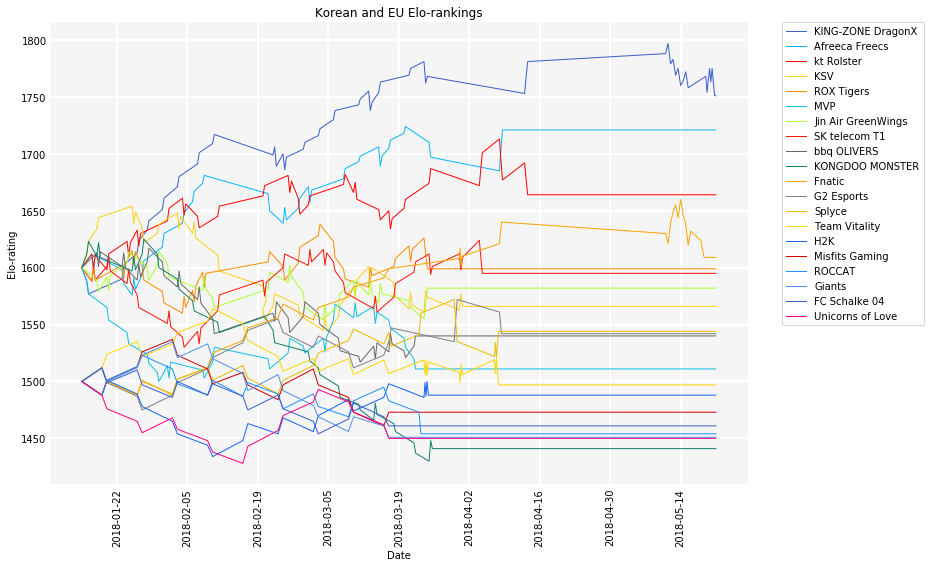

In [12]:
plot_ratings(regions=[KR, EU], highlight_teams=[], title="Korean and EU Elo-rankings")

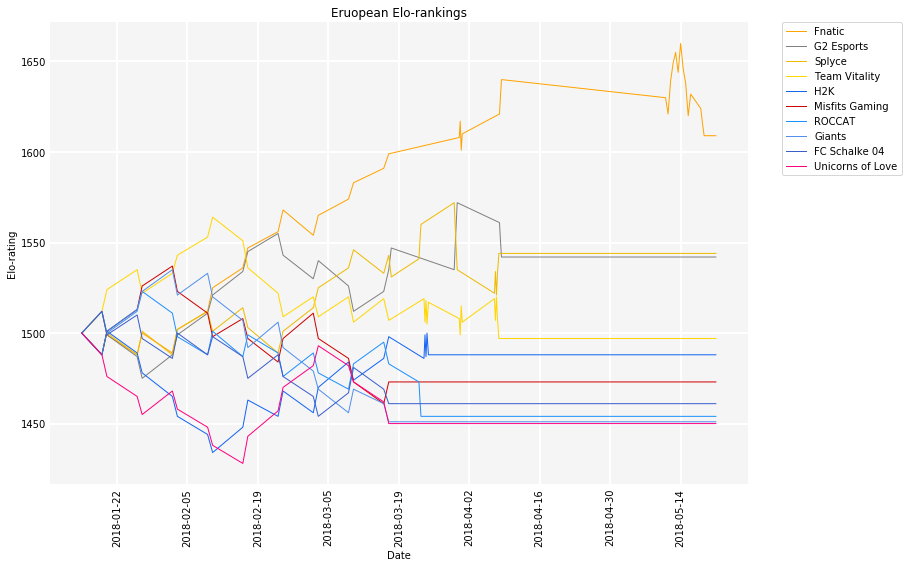

In [13]:
plot_ratings(regions=[EU], highlight_teams=[], title="Eruopean Elo-rankings")

In [14]:
predict_bo5(FNC, G2)
print('\n')
predict_bo5(VIT, SPY)

Fnatic's chance of winning a best of 5:	51.06%
G2 Esports's chance of winning a best of 5:	48.94%


Team Vitality's chance of winning a best of 5:	49.23%
Splyce's chance of winning a best of 5:	50.77%


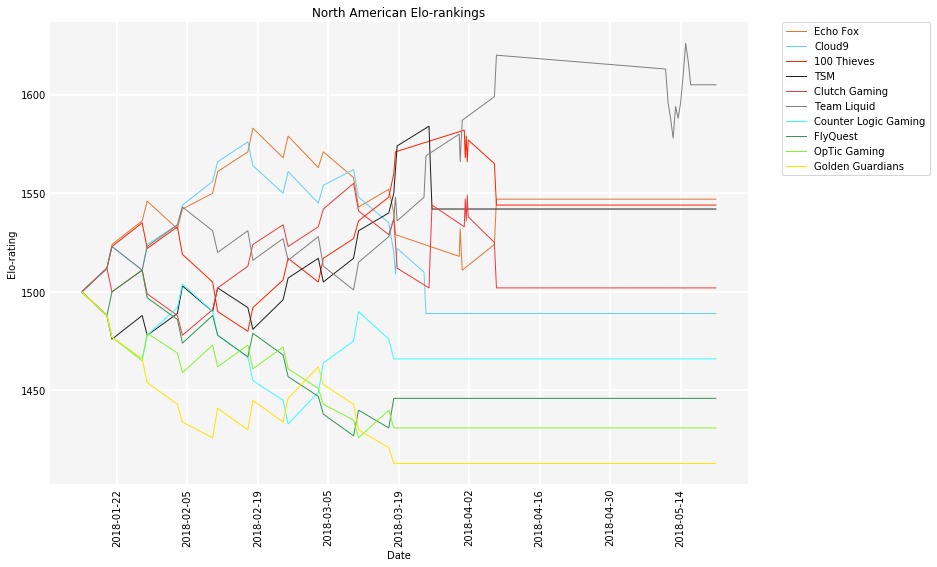

In [15]:
plot_ratings(regions=[NA], highlight_teams=[], by_index=False, title="North American Elo-rankings")

In [16]:
predict_bo5(T100, TL)
print('\n')
predict_bo5(FOX, CG)

100 Thieves's chance of winning a best of 5:	49.03%
Team Liquid's chance of winning a best of 5:	50.97%


Echo Fox's chance of winning a best of 5:	50.74%
Clutch Gaming's chance of winning a best of 5:	49.26%


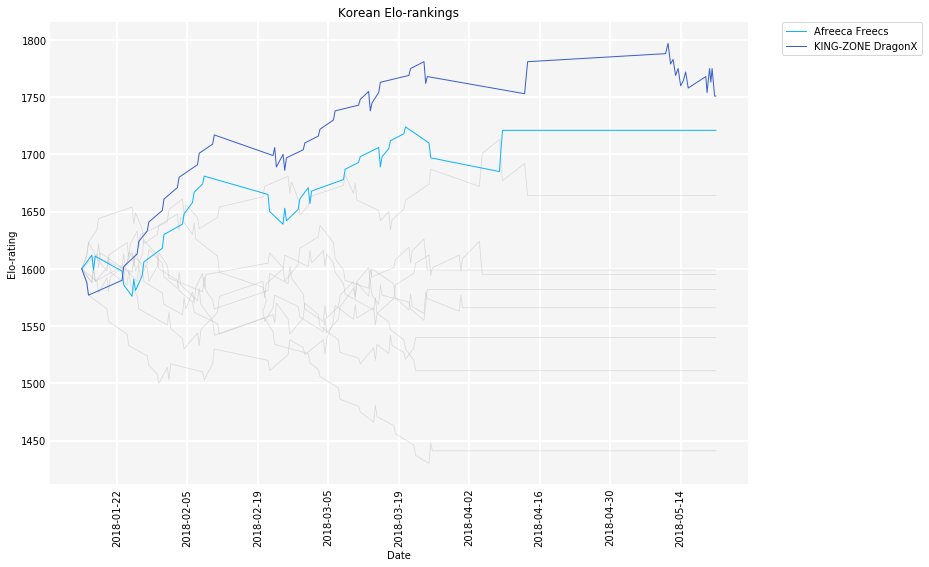

In [17]:
plot_ratings(regions=[KR], highlight_teams=[AFS, KZ], title="Korean Elo-rankings")

In [18]:
predict_winner(SKT, KT)

SK telecom T1's chance of winning:	48.94%
kt Rolster's chance of winning:	51.06%


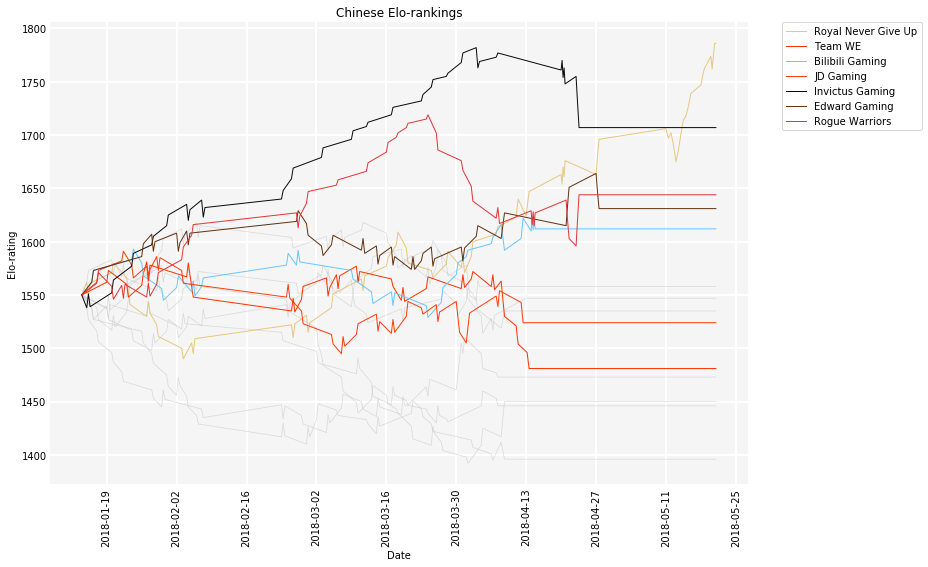

In [19]:
plot_ratings(regions=[CN], highlight_teams=[RNG, WE, BLG, JDG, IG, EDG, RW], title="Chinese Elo-rankings")

In [20]:
predict_bo5(RNG, WE)
print('\n')
predict_bo5(BLG, JDG)

Royal Never Give Up's chance of winning a best of 5:	54.67%
Team WE's chance of winning a best of 5:	45.33%


Bilibili Gaming's chance of winning a best of 5:	51.4%
JD Gaming's chance of winning a best of 5:	48.6%


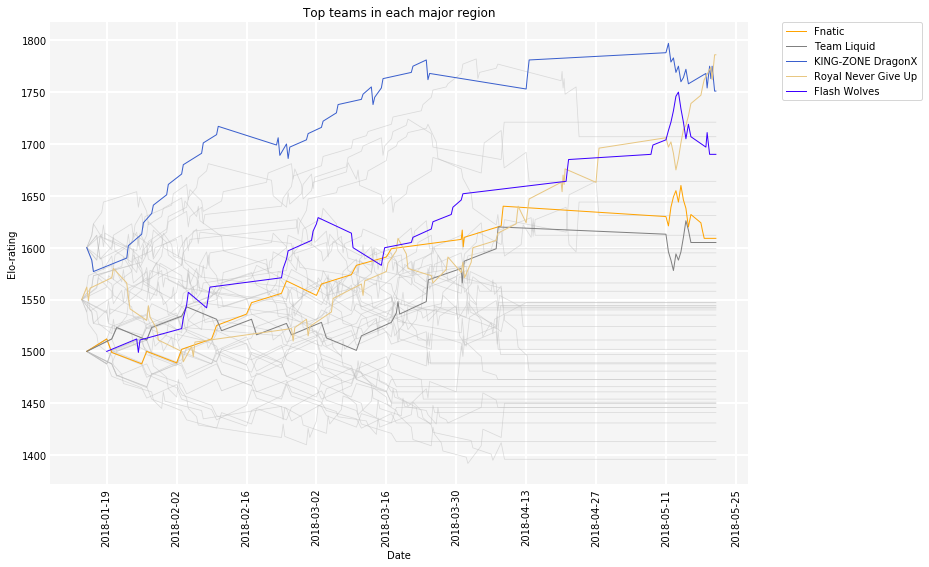

In [21]:
plot_ratings(regions=[EU, NA, KR, CN], highlight_teams=[FNC, TL, KZ, RNG, FW], title="Top teams in each major region")

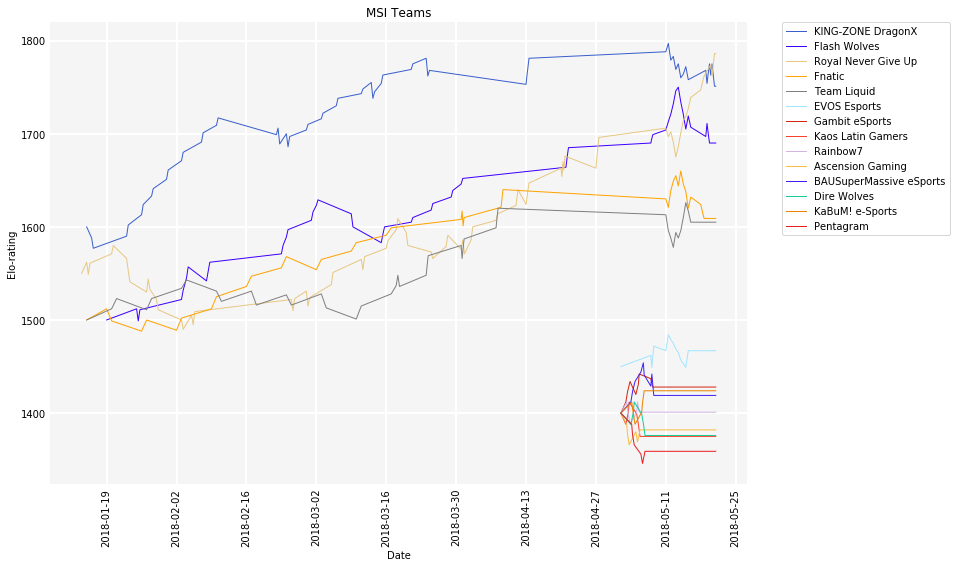

In [22]:
MSI_teams = [KZ, FW, RNG, FNC, TL, EVS, GMB, KLG, R7, ASC, SUP, DW, KBM, PGM]
plot_ratings(regions=[], highlight_teams=MSI_teams, title="MSI Teams")

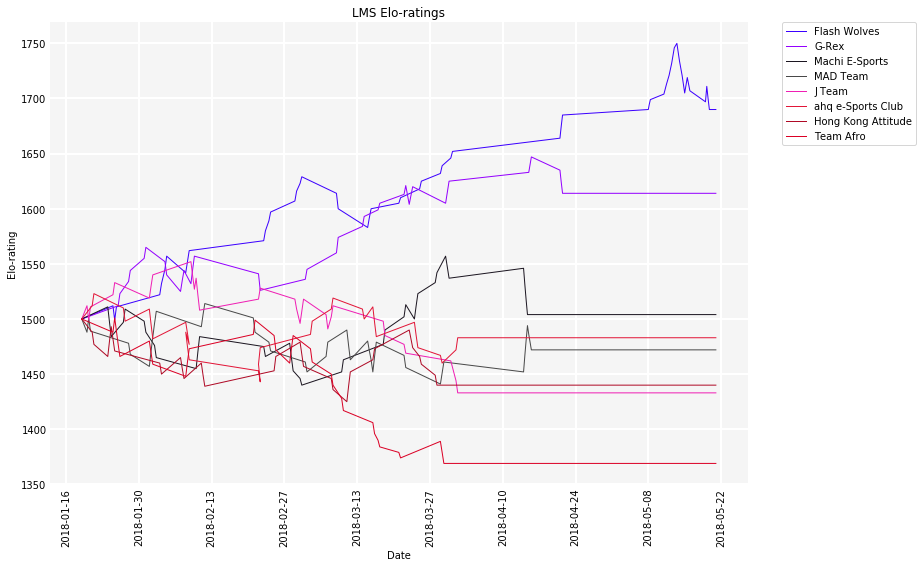

In [23]:
plot_ratings(regions=[LMS], highlight_teams=[], title="LMS Elo-ratings")